# Imports 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'processing')))
from processing import indeed_txt_pl

# Loads

In [2]:
df = indeed_txt_pl.fit_transform(pd.read_csv('../csv/jobs_it.csv')).dropna()
df.info()
df.head()

[Pipeline]  (step 1 of 2) Processing salary_transformer, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing feature_selector, total=   0.0s
<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 5 to 2999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary_mean  469 non-null    float64
 1   title        469 non-null    object 
 2   summary      469 non-null    object 
 3   desc         469 non-null    object 
dtypes: float64(1), object(3)
memory usage: 18.3+ KB


,salary_mean,title,summary,desc
5,3371.5,Data Scientist (H/F),Pour renforcer nos pôles DataScience & Analyti...,Pour renforcer nos pôles DataScience & Analyti...
9,4000.0,Docteur.e Data scientist – OCR et Système Déci...,Contribution à la mise en place de processus o...,Description du poste\r\n\r\nUNIVERS OBSERVABLE...
16,5000.0,Data Scientist Senior Editeur d’applications m...,Entrez au cur d’un éditeur spécialisé dans le...,Contexte du Poste :\r\nEntrez au cur d’un édi...
17,5000.0,Data scientist / machine learning engineer (H/...,Descriptif de la mission (au sein d'une équipe...,Descriptif de la mission (au sein d'une équipe...
18,5000.0,Data Scientist H/F,A la recherche d’une nouvelle opportunité prof...,A la recherche d’une nouvelle opportunité prof...


# Plot salary

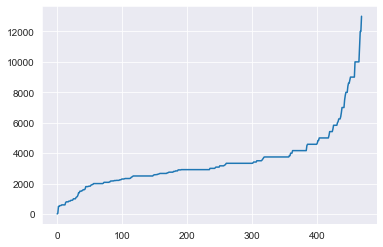

In [24]:
plt.plot(np.arange(len(df)), df['salary_min'].sort_values(axis=0))

In [51]:
feature_name = 'title'

# CountVectorize

In [52]:
X = CountVectorizer(ngram_range=(2,2)).fit_transform(df[feature_name]).toarray()
y = df['salary_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [53]:
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [54]:
model.score(X_test, y_test)

0.1893908967597866

# With Stop Words

In [41]:
stop_words = list(pd.read_csv('stop_words.csv', header=None)[0])

In [42]:
X = CountVectorizer(stop_words=list(stop_words)).fit_transform(df[feature_name]).toarray()
y = df['salary_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['je', 'juste', 'soyez', 'sujet'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [43]:
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [44]:
model.score(X_test, y_test)

0.31280493736071546